# Summers Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def summers_ratio(stocks_returns):
    # Calculate the downside returns
    downside_returns = stocks_returns.copy()
    downside_returns[downside_returns > 0] = 0

    # Calculate the expected downside return of the market
    market_downside_return = np.mean(downside_returns)

    # Calculate the Omega ratio
    omega_ratio = np.mean(stocks_returns) / abs(market_downside_return)

    # Calculate the Summers ratio
    summers_ratio = omega_ratio * abs(market_downside_return)

    return summers_ratio

Text(0, 0.5, 'Summer Ratio')

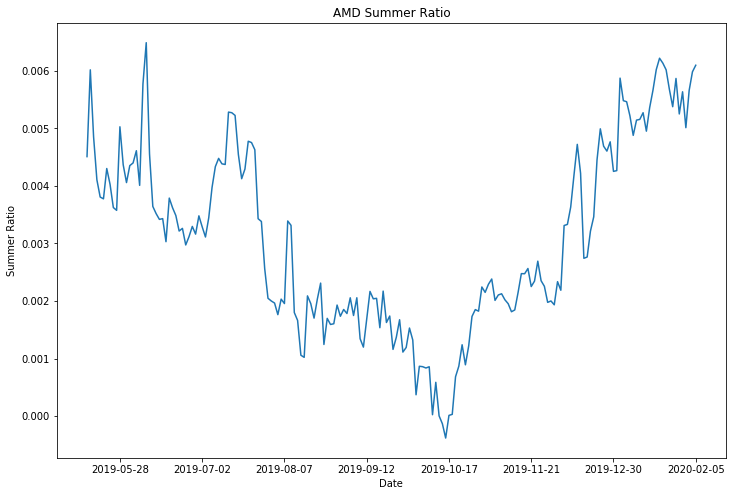

In [6]:
# Compute the running Downside Risk
running = [summers_ratio(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Downside Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Summer Ratio')
plt.xlabel('Date')
plt.ylabel('Summer Ratio')

In [7]:
stock_sr = summers_ratio(stocks_returns)
stock_s r

0.0034085846389493115

In [8]:
running = [summers_ratio(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.004507735034667003,
 0.006015385881289499,
 0.0048503558216744435,
 0.004105460890558337,
 0.003805922961622866,
 0.0037744757988298857,
 0.004301150743990844,
 0.00402720287885057,
 0.0036234944925169223,
 0.0035748298979820375,
 0.005026030063290372,
 0.0043660048620562655,
 0.004056949224463502,
 0.004351489792278877,
 0.00439791065397743,
 0.004610392471965412,
 0.004008550134551927,
 0.005769032556177431,
 0.0064871108885591715,
 0.004551780848248794,
 0.0036424021846202647,
 0.003518032647048752,
 0.003417526887208949,
 0.003430522701608939,
 0.003029820552888275,
 0.003787305648354111,
 0.0036193035067675215,
 0.003484181237850497,
 0.0032150069529600683,
 0.0032614915094057967,
 0.002973443703441498,
 0.0031173361995684803,
 0.0032951624288059304,
 0.003161424651519846,
 0.003479005057592492,
 0.0032888644838588665,
 0.0031114395855589023,
 0.0034467039108982893,
 0.003972211664773538,
 0.004333486021929711,
 0.004477167582826411,
 0.004382580724689004,
 0.00437118610875121,